<a href="https://colab.research.google.com/github/yuvalBerghaus/Data_science/blob/main/Final_Project_Asaf_Baibekov_207130519_Yuval_Bergraus_313247116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Million Beer Reviews From Beer Advocate](https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate)

# Mount the Google Drive into the notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
main_path = 'gdrive/MyDrive/Shenkar/python/Final Project/'

# Install the Kaggle framework to download the Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp /content/gdrive/MyDrive/Shenkar/python/Final\ Project/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    'thedevastator/1-5-million-beer-reviews-from-beer-advocate',
    path=main_path,
    unzip=True
)

In [ ]:
!ls -a gdrive/MyDrive/Shenkar/python/Final\ Project/

beer_reviews.csv  kaggle.json


# Preprocessing

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 100

rows = [
    ["brewery_id"        , "The id number of the brewery that made the beer"                    , "Int"   ],
    ["brewery_name"      , "The name of the brewery that made the beer"                         , "String"],
    ["review_time"       , "The date and time of the review"                                    , "String"],
    ["review_overall"    , "The reviewer's overall rating of the beer on a scale of 1 to 5"     , "Float" ],
    ["review_aroma"      , "The reviewer's rating of the beer's aroma on a scale of 1 to 5"     , "Float" ],
    ["review_appearance" , "The reviewer's rating of the beer's appearance on a scale of 1 to 5", "Float" ],
    ["review_profilename", "The reviewer's username"                                            , "String"],
    ["beer_style"        , "The style of beer"                                                  , "String"],
    ["review_palate"     , "The reviewer's rating of the beer's palate on a scale of 1 to 5"    , "Float" ],
    ["review_taste"      , "The reviewer's rating of the beer's taste on a scale of 1 to 5"     , "Float" ],
    ["beer_beerid"       , "The id of the beer"                                                 , "Int"   ],
    ["beer_name"         , "The name of the beer"                                               , "String"],
    ["beer_abv"          , "The alcohol by volume of the beer"                                  , "Float" ]
]
pd.DataFrame(rows, columns=["feature", "description", "type"])

,feature,description,type
0,brewery_id,The id number of the brewery that made the beer,Int
1,brewery_name,The name of the brewery that made the beer,String
2,review_time,The date and time of the review,String
3,review_overall,The reviewer's overall rating of the beer on a scale of 1 to 5,Float
4,review_aroma,The reviewer's rating of the beer's aroma on a scale of 1 to 5,Float
5,review_appearance,The reviewer's rating of the beer's appearance on a scale of 1 to 5,Float
6,review_profilename,The reviewer's username,String
7,beer_style,The style of beer,String
8,review_palate,The reviewer's rating of the beer's palate on a scale of 1 to 5,Float
9,review_taste,The reviewer's rating of the beer's taste on a scale of 1 to 5,Float


We will load the dataset into a pandas dataframe\
and check for how many rows has NaN values

In [ ]:
df = pd.read_csv(main_path + 'beer_reviews.csv')
# Count the number of rows that contain NaN
nan_rows = df.isna().any(axis=1).sum()

# Count the total number of rows
total_rows = len(df)

# Calculate the percentage of rows with NaN
percent_nan = nan_rows / total_rows * 100
"The percentage of rows that contain at least one NaN is " + str(format(percent_nan, ".2f")) + "%"

'The percentage of rows that contain at least one NaN is 4.29%'

Since 4.29% is a small amount of rows relative to the total rows\
we can conclude that it is better to work without NaN rows

In [ ]:
df.dropna(inplace=True)

We don't care for the index of the beer in the table

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df["beer_style"] = df["beer_style"].astype("category")


The following code analysis is essentially adding more information to an existing dataset of beer reviews. By extracting year, month, and day information from the 'review_time' column and creating a new 'time_of_day' column, we can gain insights into the temporal patterns of beer reviews.

For example, we can use the 'review_year' column to see if there are any trends or changes in beer reviews over time. We can also use the 'review_month' column to see if there are seasonal patterns in beer reviews, such as more reviews of stouts and porters in the winter months.

The 'time_of_day' column can give us insights into when people are likely to review beer. We might find that people tend to review beer more in the evening or night, which could have implications for marketing or advertising beer.

Reordering the columns in the dataset is also a helpful step for ease of analysis and visualization. By putting related columns together, we can more easily compare and contrast different aspects of the dataset and draw meaningful insights from it.

In [ ]:
df['review_date'] = pd.to_datetime(df['review_time'], unit='s')
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month
df['review_day'] = df['review_date'].dt.day

import numpy as np
morning = (df['review_date'].dt.hour >= 6) & (df['review_date'].dt.hour < 12)
noon = (df['review_date'].dt.hour >= 12) & (df['review_date'].dt.hour < 18)
evening = (df['review_date'].dt.hour >= 18) & (df['review_date'].dt.hour < 24)
night = (df['review_date'].dt.hour >= 0) & (df['review_date'].dt.hour < 6)

df['time_of_day'] = np.where(
    morning, 'morning',
    np.where(
        noon, 'noon',
        np.where(
            evening, 'evening',
            'night'
        )
    )
)

desired_column_order = [
    "review_profilename", "beer_beerid", "beer_name", "beer_style", "beer_abv", "brewery_id", "brewery_name",
    "review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste",
    "review_time", "review_date", "review_year", "review_month", "review_day", "time_of_day"
]

df = df.reindex(columns=desired_column_order)
df.head(10)

,review_profilename,beer_beerid,beer_name,beer_style,beer_abv,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,review_time,review_date,review_year,review_month,review_day,time_of_day
0,stcules,47986,Sausa Weizen,Hefeweizen,5.0,10325,Vecchio Birraio,1.5,2.0,2.5,1.5,1.5,1234817823,2009-02-16 20:57:03,2009,2,16,evening
1,stcules,48213,Red Moon,English Strong Ale,6.2,10325,Vecchio Birraio,3.0,2.5,3.0,3.0,3.0,1235915097,2009-03-01 13:44:57,2009,3,1,noon
2,stcules,48215,Black Horse Black Beer,Foreign / Export Stout,6.5,10325,Vecchio Birraio,3.0,2.5,3.0,3.0,3.0,1235916604,2009-03-01 14:10:04,2009,3,1,noon
3,stcules,47969,Sausa Pils,German Pilsener,5.0,10325,Vecchio Birraio,3.0,3.0,3.5,2.5,3.0,1234725145,2009-02-15 19:12:25,2009,2,15,evening
4,johnmichaelsen,64883,Cauldron DIPA,American Double / Imperial IPA,7.7,1075,Caldera Brewing Company,4.0,4.5,4.0,4.0,4.5,1293735206,2010-12-30 18:53:26,2010,12,30,evening
5,oline73,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,1075,Caldera Brewing Company,3.0,3.5,3.5,3.0,3.5,1325524659,2012-01-02 17:17:39,2012,1,2,noon
6,Reidrover,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,1075,Caldera Brewing Company,3.5,3.5,3.5,4.0,4.0,1318991115,2011-10-19 02:25:15,2011,10,19,night
7,alpinebryant,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,1075,Caldera Brewing Company,3.0,2.5,3.5,2.0,3.5,1306276018,2011-05-24 22:26:58,2011,5,24,evening
8,LordAdmNelson,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,1075,Caldera Brewing Company,4.0,3.0,3.5,3.5,4.0,1290454503,2010-11-22 19:35:03,2010,11,22,evening
9,augustgarage,52159,Caldera Ginger Beer,Herbed / Spiced Beer,4.7,1075,Caldera Brewing Company,4.5,3.5,5.0,4.0,4.0,1285632924,2010-09-28 00:15:24,2010,9,28,night


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   review_profilename  1518478 non-null  object        
 1   beer_beerid         1518478 non-null  int64         
 2   beer_name           1518478 non-null  object        
 3   beer_style          1518478 non-null  category      
 4   beer_abv            1518478 non-null  float64       
 5   brewery_id          1518478 non-null  int64         
 6   brewery_name        1518478 non-null  object        
 7   review_overall      1518478 non-null  float64       
 8   review_aroma        1518478 non-null  float64       
 9   review_appearance   1518478 non-null  float64       
 10  review_palate       1518478 non-null  float64       
 11  review_taste        1518478 non-null  float64       
 12  review_time         1518478 non-null  int64         
 13  review_date 

# Analyzing

## Insights From DataFrames

In [ ]:
"looks like there are " + str(len(df["beer_beerid"].unique())) + " different beers"

'looks like there are 49000 different beers'

In [ ]:
"looks like there are " + str(len(df["review_profilename"].unique())) + " reviewers"

'looks like there are 32908 reviewers'

Looks like the most reviewed brewery beers is the brewery: Rock Bottom Restaurant & Brewery

In [ ]:
df.groupby(["brewery_id", "brewery_name"])["beer_beerid"]\
    .nunique()\
    .rename("reviewed beers owned by brewery")\
    .sort_values(ascending=False)\
    .head()\
    .to_frame()

,,reviewed beers owned by brewery
brewery_id,brewery_name,
1550,Rock Bottom Restaurant & Brewery,512
1549,Goose Island Beer Co.,304
6045,Iron Hill Brewery & Restaurant,269
1177,Minneapolis Town Hall Brewery,243
5318,Port Brewing Company / Pizza Port,194


The output shows the top 5 breweries with the most reviewed beers owned by the brewery, based on the input dataframe df. The breweries are listed in descending order of the number of reviewed beers, with the brewery ID, name, and number of reviewed beers owned by the brewery included in the output. The top brewery, Rock Bottom Restaurant & Brewery, has 512 reviewed beers owned by the brewery, followed by Goose Island Beer Co. with 304, Iron Hill Brewery & Restaurant with 269, Minneapolis Town Hall Brewery with 243, and Port Brewing Company / Pizza Port with 194.

Looks like the reviewer: "northyorksammy" reviewed the most beers then anybody else

In [ ]:
df.groupby("review_profilename")["beer_beerid"]\
    .count()\
    .rename("beer_count")\
    .sort_values(ascending=False)\
    .head()\
    .to_frame()

,beer_count
review_profilename,
northyorksammy,5346
mikesgroove,4283
BuckeyeNation,4246
Thorpe429,3273
brentk56,3186


The output shows the top five reviewers in terms of the number of beers they have reviewed, along with the total number of beers they have reviewed. The reviewer with the highest number of reviews is "northyorksammy" with 5346 reviews, followed by "mikesgroove" with 4283 reviews and "BuckeyeNation" with 4246 reviews.





Looks like there are some reviewers that reviewed the same beer more than once\
But the maximum number of duplicated reviews are 4

In [ ]:
df.groupby(["review_profilename", "beer_beerid"])\
    .size()\
    .reset_index(name="count")\
    .query("`count` > 1")\
    .sort_values(by="count", ascending=False)

,review_profilename,beer_beerid,count
539340,Slatetank,15881,4
15047,AgentMunky,44713,4
1093633,kingcrowing,16814,4
609825,Tucquan,55342,4
1055993,johnmichaelsen,29619,4
...,...,...,...
510085,RustyDiamond,46849,2
510091,RustyDiamond,47692,2
511687,Ryan011235,29619,2
511859,Ryan011235,49151,2


Looks like the most reviewed beer style is **American IPA**

In [ ]:
df.groupby('beer_style')\
    .size()\
    .rename("Amount Of Reviews")\
    .sort_values(ascending=False)\
    .to_frame()

,Amount Of Reviews
beer_style,
American IPA,113144
American Double / Imperial IPA,85105
American Pale Ale (APA),58072
Russian Imperial Stout,53424
American Double / Imperial Stout,50137
...,...
English Pale Mild Ale,648
Faro,608
Roggenbier,395


## Insights From Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

From the resulting correlation matrix, we can see that there are strong positive correlations between review_overall, review_aroma, review_palate, and review_taste.\
review_appearance shows a moderate positive correlation with review_palate and a moderate negative correlation with review_aroma.

In [ ]:
params = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]
df[params].corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.612793,0.498557,0.699020,0.787171
review_aroma,0.612793,1.000000,0.559077,0.614924,0.714777
review_appearance,0.498557,0.559077,1.000000,0.564555,0.544579
review_palate,0.699020,0.614924,0.564555,1.000000,0.732201
review_taste,0.787171,0.714777,0.544579,0.732201,1.000000


<AxesSubplot:>

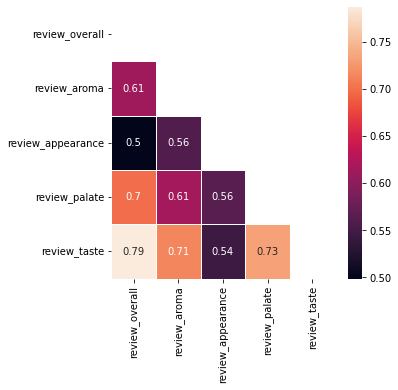

In [ ]:
params = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]
corr = df[params].corr()
import numpy as np
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, mask=mask)

Looks like most reviews happened in the night and after that in the evening\
Therefore we can see that most people like to drink at night.

<AxesSubplot:xlabel='Time of Day', ylabel='Number Of Reviews'>

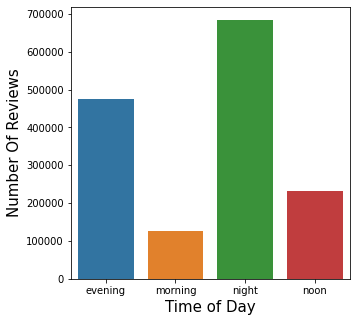

In [ ]:
tod_counts = df.groupby('time_of_day')['time_of_day'].count()
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=tod_counts.index, y=tod_counts.values, ax=ax)
ax.set_xlabel("Time of Day", fontsize=15)
ax.set_ylabel("Number Of Reviews", fontsize=15)
ax

This is a chart that shows how many reviewes had each beer style

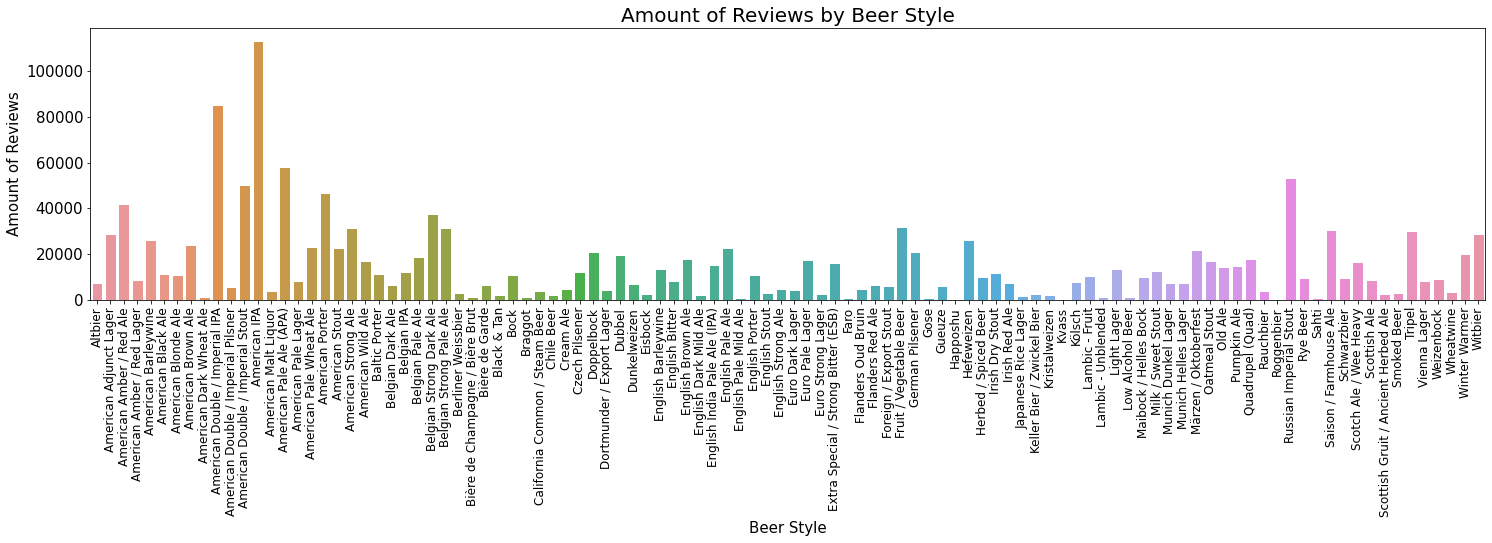

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))

df_beer_style = df.groupby('beer_style')\
    .size()\
    .rename("Amount Of Reviews")\
    .sort_values(ascending=False)\
    .to_frame()

sns.set_style("whitegrid")
sns.barplot(x=df_beer_style.index, y="Amount Of Reviews", data=df_beer_style)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Beer Style", fontsize=15)
plt.ylabel("Amount of Reviews", fontsize=15)
plt.title("Amount of Reviews by Beer Style", fontsize=20)
plt.show()

This chart shows the mean alcohol by volume per beer style

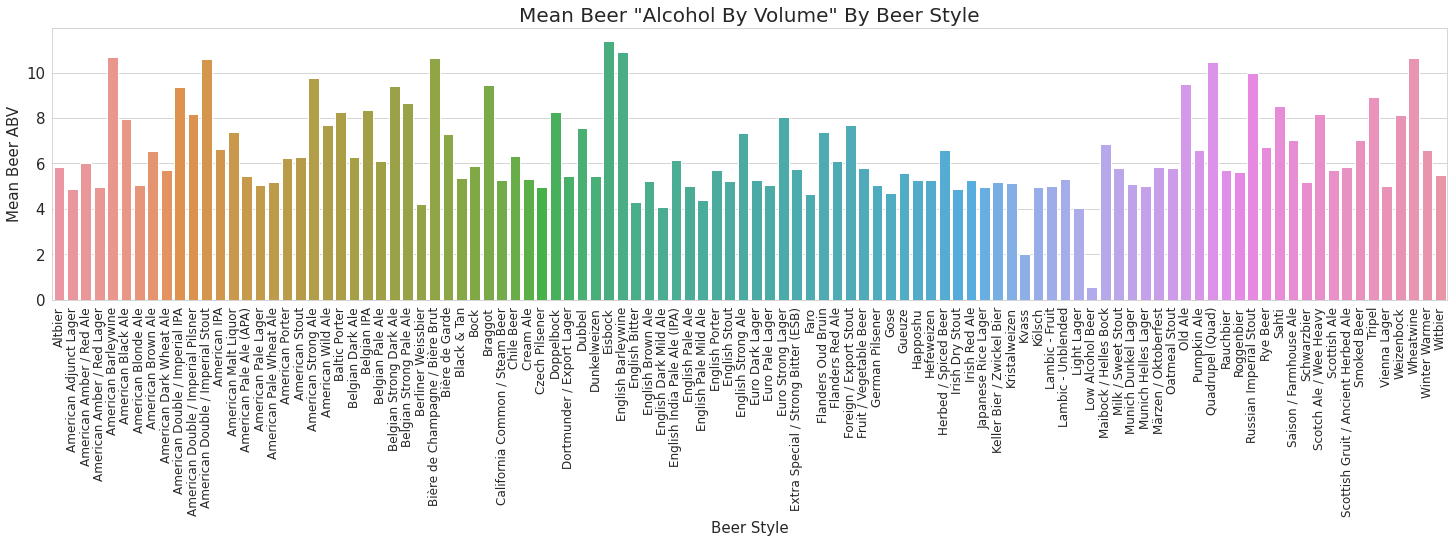

In [ ]:
fig, ax = plt.subplots(figsize=(25, 5))

df_mean_abv_per_style = df.groupby('beer_style')['beer_abv']\
    .mean()\
    .rename("Mean Beer ABV")\
    .sort_values(ascending=False)\
    .to_frame()

sns.set_style("whitegrid")
sns.barplot(x=df_mean_abv_per_style.index, y="Mean Beer ABV", data=df_mean_abv_per_style)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Beer Style", fontsize=15)
plt.ylabel("Mean Beer ABV", fontsize=15)
plt.title("Mean Beer \"Alcohol By Volume\" By Beer Style", fontsize=20)
plt.show()

We can see from the following graph that the number of reviews are higher than 15000 reviews from 12/2007 until 12/2011\
Moreover we can see that the peak of the maximum reviews was at 01/2011

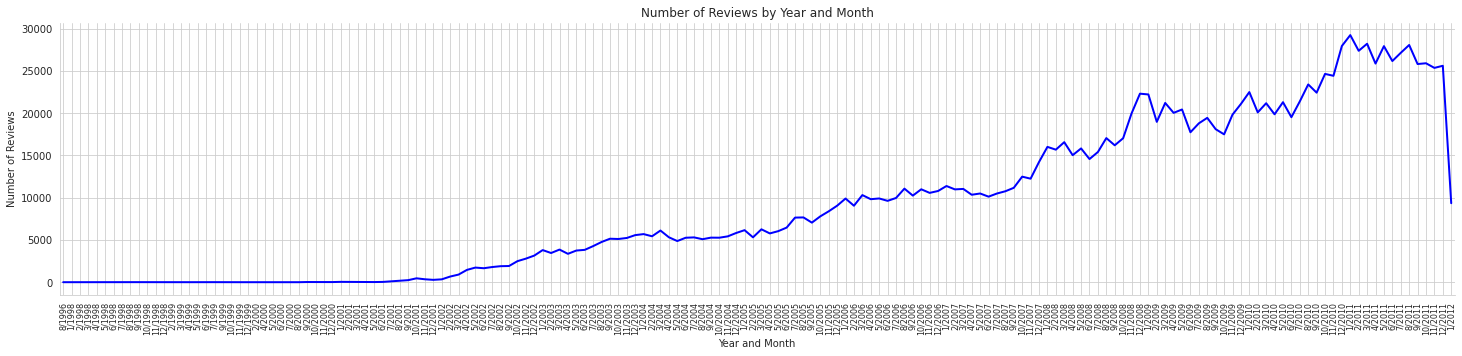

In [ ]:
review_count_by_year_and_month = df.groupby(["review_year", "review_month"]).count()["review_overall"]
review_count_by_year_and_month.index = review_count_by_year_and_month.index.map(lambda x: str(x[1]) + "/" + str(x[0]))

plt.figure(figsize=(25,5))
sns.lineplot(data=review_count_by_year_and_month, color='blue', linewidth=2)
sns.despine()

xticks_positions = range(0, len(review_count_by_year_and_month), 1)
xticks_labels = review_count_by_year_and_month.index[xticks_positions]

plt.xticks(xticks_positions, xticks_labels, rotation=90, fontsize=8)
plt.margins(x=0.0025)
plt.ylabel('Number of Reviews')
plt.xlabel('Year and Month')
plt.title('Number of Reviews by Year and Month')
plt.grid(True)
plt.show()

Looks like the mean ABV per month grew up almost linearly\
Thus, maybe we can predict what will be the mean ABV that people can review next month

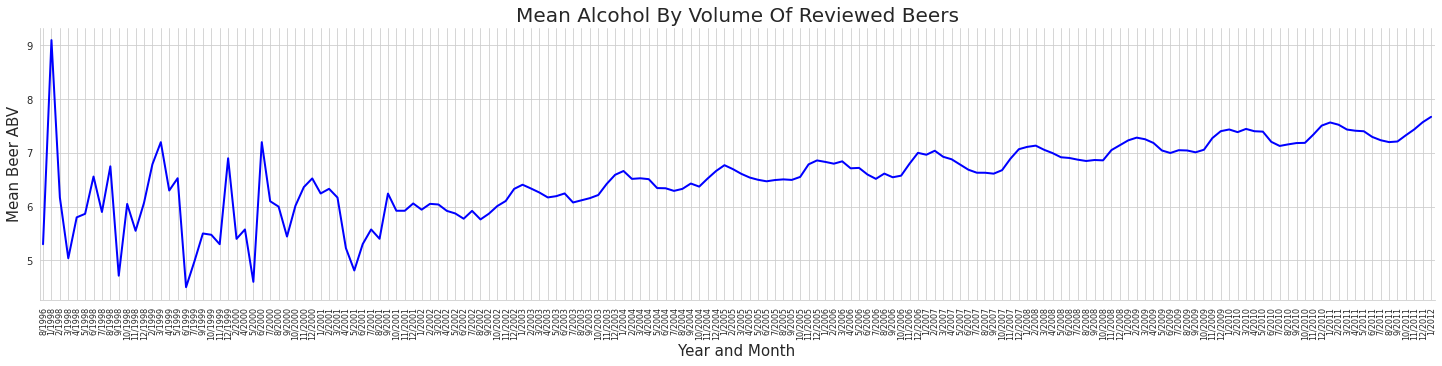

In [ ]:
review_mean_abv_by_year_and_month = df.groupby(["review_year", "review_month"])["beer_abv"].mean()
review_mean_abv_by_year_and_month.index = review_mean_abv_by_year_and_month.index.map(lambda x: str(x[1]) + "/" + str(x[0]))

plt.figure(figsize=(25,5))
sns.lineplot(data=review_mean_abv_by_year_and_month, color='blue', linewidth=2)
sns.despine()

xticks_positions = range(0, len(review_mean_abv_by_year_and_month), 1)
xticks_labels = review_mean_abv_by_year_and_month.index[xticks_positions]

plt.xticks(xticks_positions, xticks_labels, rotation=90, fontsize=8)
plt.margins(x=0.0025)
plt.ylabel('Mean Beer ABV', fontsize=15)
plt.xlabel('Year and Month', fontsize=15)
plt.title('Mean Alcohol By Volume Of Reviewed Beers', fontsize=20)
plt.grid(True)
plt.show()

# Machine Learning

Performing a linear regression analysis to predict the average alcohol content by volume of beers reviewed each month over time. It groups the data by year and month, prepares the X and y data for the linear regression model, trains the model, makes predictions, and plots the actual vs. predicted values. The plot displays the actual average alcohol content by volume of reviewed beers as a blue line and the predicted values as a red dashed line over time. The plot also has gridlines and labels on the x and y axes to help with interpretation.

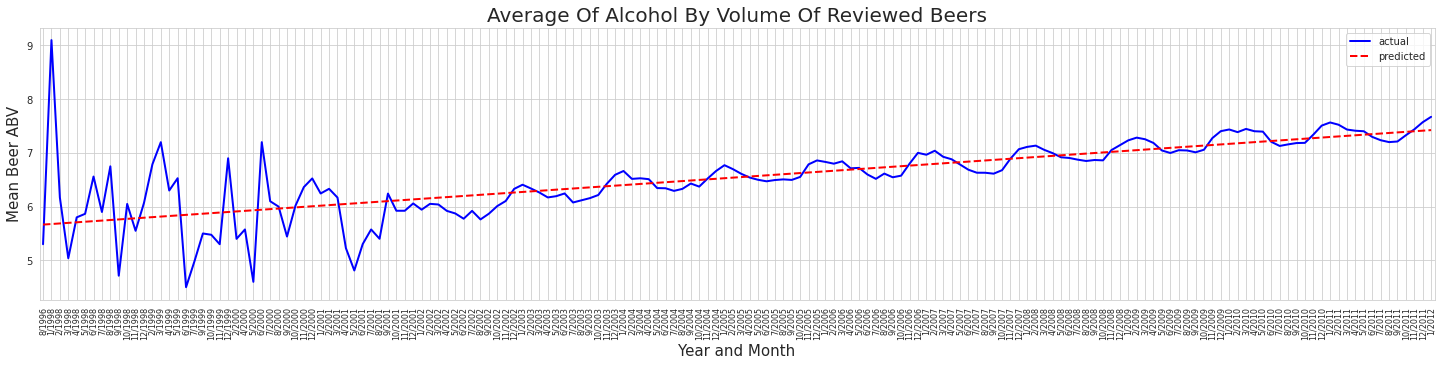

In [ ]:
from sklearn.linear_model import LinearRegression

# Group the data by year and month
review_count_by_year_and_month = df.groupby(["review_year", "review_month"])["beer_abv"].mean()
review_count_by_year_and_month.index = review_count_by_year_and_month.index.map(lambda x: str(x[1]) + "/" + str(x[0]))

# Prepare the X and y data
X = np.array([[i] for i in range(len(review_count_by_year_and_month))])
y = np.array(review_count_by_year_and_month)

# Train the model
reg = LinearRegression().fit(X, y)

# Predict the values
predictions = reg.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(25,5))

sns.lineplot(data=review_count_by_year_and_month, label='actual', color='blue', linewidth=2)
sns.lineplot(data=predictions, label='predicted', color='red', linestyle='--', linewidth=2)
plt.legend()
plt.xticks(xticks_positions, xticks_labels, rotation=90, fontsize=8)
plt.margins(x=0.0025)
plt.ylabel('Mean Beer ABV', fontsize=15)
plt.xlabel('Year and Month', fontsize=15)
plt.title('Average Of Alcohol By Volume Of Reviewed Beers', fontsize=20)
plt.grid(True)
plt.show()


we seek to classify these beer styles into fewer categories due to their comparable number of reviews and significant amount of data available.

1. American Pale Ale (APA)
2. Russian Imperial Stout
3. American Double / Imperial Stout
4. American Porter

In [ ]:
df['beer_style']\
    .value_counts()\
    .sort_values(ascending=False)\
    .to_frame()\
    .head(10)

,beer_style
American IPA,113144
American Double / Imperial IPA,85105
American Pale Ale (APA),58072
Russian Imperial Stout,53424
American Double / Imperial Stout,50137
American Porter,46647
American Amber / Red Ale,41731
Belgian Strong Dark Ale,37498
Fruit / Vegetable Beer,31983
American Strong Ale,31350


In [ ]:
# Import required libraries

styles = ['American Double / Imperial IPA', 'American Pale Ale (APA)', 'Russian Imperial Stout', 'American Double / Imperial Stout']
df_filtered = df[df['beer_style'].isin(styles)]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target variable
X = df_filtered[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'beer_abv']]
y = df_filtered['beer_style']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict the target variable using the trained model
y_pred = rfc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
"Accuracy: " + str(accuracy)

'Accuracy: 0.7318635000405285'

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
target_names = styles
print(classification_report(y_test, y_pred, target_names=target_names))


                                  precision    recall  f1-score   support

  American Double / Imperial IPA       0.66      0.79      0.72     25620
         American Pale Ale (APA)       0.65      0.60      0.62     14962
          Russian Imperial Stout       0.99      0.99      0.99     17432
American Double / Imperial Stout       0.65      0.49      0.56     16008

                        accuracy                           0.73     74022
                       macro avg       0.74      0.72      0.72     74022
                    weighted avg       0.73      0.73      0.73     74022



This is a heatmap showing the predicted vs. actual classifications for each of the four beer styles in the test set.\
The diagonal elements of the heatmap represent the number of correct predictions for each beer style, while the off-diagonal elements represent the number of misclassifications.

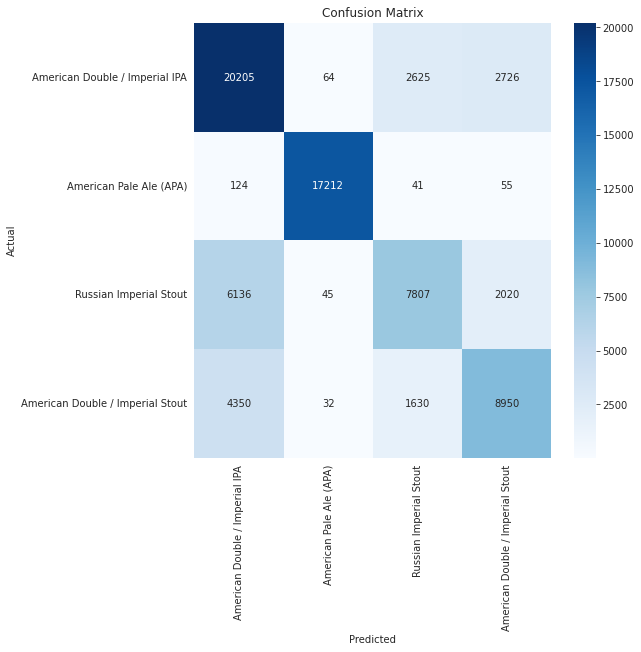

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=styles)

fix, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=styles, yticklabels=styles, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from google.colab import files
df.to_csv('beer_reviews_after.csv', index=False)
files.download('beer_reviews_after.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>